In [1]:
#https://data.mendeley.com/datasets/5y9wdsg2zt/1 (data)
import os, shutil

In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_pos_dir = '/home/rongzhen/chalmers/digital_twin/crack_image/Positive'
original_dataset_neg_dir = '/home/rongzhen/chalmers/digital_twin/crack_image/Negative'

# The directory where we will
# store our smaller dataset
base_dir = '/home/rongzhen/chalmers/digital_twin/crack_image/CNN_GPU'
if os.path.exists(base_dir):
  os.system("rm -rf {}".format(base_dir))
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training posive pictures
train_pos_dir = os.path.join(train_dir, 'pos')
os.mkdir(train_pos_dir)

# Directory with our training negative pictures
train_neg_dir = os.path.join(train_dir, 'neg')
os.mkdir(train_neg_dir)

# Directory with our validation positive pictures
validation_pos_dir = os.path.join(validation_dir, 'pos')
os.mkdir(validation_pos_dir)

# Directory with our validation negative pictures
validation_neg_dir = os.path.join(validation_dir, 'neg')
os.mkdir(validation_neg_dir)

# Directory with our validation positive pictures
test_pos_dir = os.path.join(test_dir, 'pos')
os.mkdir(test_pos_dir)

# Directory with our validation negative pictures
test_neg_dir = os.path.join(test_dir, 'neg')
os.mkdir(test_neg_dir)

In [3]:
# change file name such as 10000_1.jpg to 10000.jpg
for f in os.listdir(original_dataset_pos_dir):
    fname_split = f.split("_")
    if len(fname_split)!=1:
        src = os.path.join(original_dataset_pos_dir,f)
        dst = os.path.join(original_dataset_pos_dir,fname_split[0]+'.jpg')
        os.rename(src, dst) 

for f in os.listdir(original_dataset_neg_dir):
    fname_split = f.split("_")
    if len(fname_split)!=1:
        src = os.path.join(original_dataset_neg_dir,f)
        dst = os.path.join(original_dataset_neg_dir,fname_split[0]+'.jpg')
        os.rename(src, dst) 

# Note: may need to shuffle the images then copy to train, test, validation

In [4]:
# Copy first 14000 images to train
fnames = ['{0:05}.jpg'.format(i) for i in range(1,14001) ]
for fname in fnames:
    src_pos = os.path.join(original_dataset_pos_dir, fname)
    src_neg = os.path.join(original_dataset_neg_dir, fname)

    dst_pos = os.path.join(train_pos_dir, fname)
    dst_neg = os.path.join(train_neg_dir, fname)

    shutil.copyfile(src_pos, dst_pos)
    shutil.copyfile(src_neg, dst_neg)

# Copy first 4000 images to validation
fnames = ['{0:05}.jpg'.format(i) for i in range(14001,18001) ]
for fname in fnames:
    src_pos = os.path.join(original_dataset_pos_dir, fname)
    src_neg = os.path.join(original_dataset_neg_dir, fname)

    dst_pos = os.path.join(validation_pos_dir, fname)
    dst_neg = os.path.join(validation_neg_dir, fname)

    shutil.copyfile(src_pos, dst_pos)
    shutil.copyfile(src_neg, dst_neg)

    
# Copy first 2000 images to test
fnames = ['{0:05}.jpg'.format(i) for i in range(18001,20001) ]
for fname in fnames:
    src_pos = os.path.join(original_dataset_pos_dir, fname)
    src_neg = os.path.join(original_dataset_neg_dir, fname)

    dst_pos = os.path.join(test_pos_dir, fname)
    dst_neg = os.path.join(test_neg_dir, fname)

    shutil.copyfile(src_pos, dst_pos)
    shutil.copyfile(src_neg, dst_neg)
    
  

In [5]:
print('total training pos images:', len(os.listdir(train_pos_dir)))
print('total training neg images:', len(os.listdir(train_neg_dir)))

total training pos images: 14000
total training neg images: 14000


In [6]:
print('total test pos images:', len(os.listdir(test_pos_dir)))
print('total test neg images:', len(os.listdir(test_neg_dir)))

total test pos images: 2000
total test neg images: 2000


In [7]:
print('total validation pos images:', len(os.listdir(validation_pos_dir)))
print('total validation neg images:', len(os.listdir(validation_neg_dir)))

total validation pos images: 4000
total validation neg images: 4000


In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 225, 225, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
__________

In [10]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(227, 227),
        batch_size=56,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=40,
        class_mode='binary')

Found 28000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [12]:
train_dir

'/home/rongzhen/chalmers/digital_twin/crack_image/CNN_GPU/train'

In [13]:
validation_dir

'/home/rongzhen/chalmers/digital_twin/crack_image/CNN_GPU/validation'

In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (56, 227, 227, 3)
labels batch shape: (56,)
[[[[0.67058825 0.6039216  0.5647059 ]
   [0.7019608  0.63529414 0.59607846]
   [0.69411767 0.6313726  0.5803922 ]
   ...
   [0.82745105 0.7803922  0.7254902 ]
   [0.82745105 0.7803922  0.7254902 ]
   [0.82745105 0.7803922  0.7254902 ]]

  [[0.63529414 0.5686275  0.5294118 ]
   [0.6745098  0.60784316 0.5686275 ]
   [0.68235296 0.6156863  0.5764706 ]
   ...
   [0.8313726  0.7843138  0.7294118 ]
   [0.8313726  0.7843138  0.7294118 ]
   [0.8313726  0.7843138  0.7294118 ]]

  [[0.58431375 0.5294118  0.48627454]
   [0.63529414 0.5803922  0.5372549 ]
   [0.6666667  0.6117647  0.5686275 ]
   ...
   [0.8352942  0.78823537 0.73333335]
   [0.8352942  0.78823537 0.73333335]
   [0.8352942  0.78823537 0.73333335]]

  ...

  [[0.8196079  0.7803922  0.7411765 ]
   [0.81568635 0.77647066 0.7372549 ]
   [0.8117648  0.7725491  0.73333335]
   ...
   [0.8235295  0.7686275  0.7254902 ]
   [0.82745105 0.7725491  0.7294118 ]
   [0.8313726  0.776470

In [15]:
#import tensorflow as tf
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True

history = model.fit_generator(
      train_generator,
      steps_per_epoch=500,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
500/500 [==============================] - 174s 347ms/step - loss: 0.1199 - acc: 0.9574 - val_loss: 0.0525 - val_acc: 0.9821
Epoch 2/10
500/500 [==============================] - 168s 336ms/step - loss: 0.0469 - acc: 0.9860 - val_loss: 0.0352 - val_acc: 0.9899
Epoch 3/10
500/500 [==============================] - 162s 323ms/step - loss: 0.0337 - acc: 0.9891 - val_loss: 0.0370 - val_acc: 0.9885
Epoch 4/10
500/500 [==============================] - 166s 332ms/step - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0180 - val_acc: 0.9946
Epoch 5/10
500/500 [==============================] - 171s 342ms/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0424 - val_acc: 0.9859
Epoch 6/10
500/500 [==============================] - 176s 353ms/step - loss: 0.0171 - acc: 0.9953 - val_loss: 0.0185 - val_acc: 0.9934
Epoch 7/10
500/500 [==============================] - 162s 325ms/step - loss: 0.0153 - acc: 0.9955 - val_loss: 0.0114 - val_acc: 0.9966


In [16]:
model.save('crack_manual_gpu.h5')

<IPython.core.display.Javascript object>


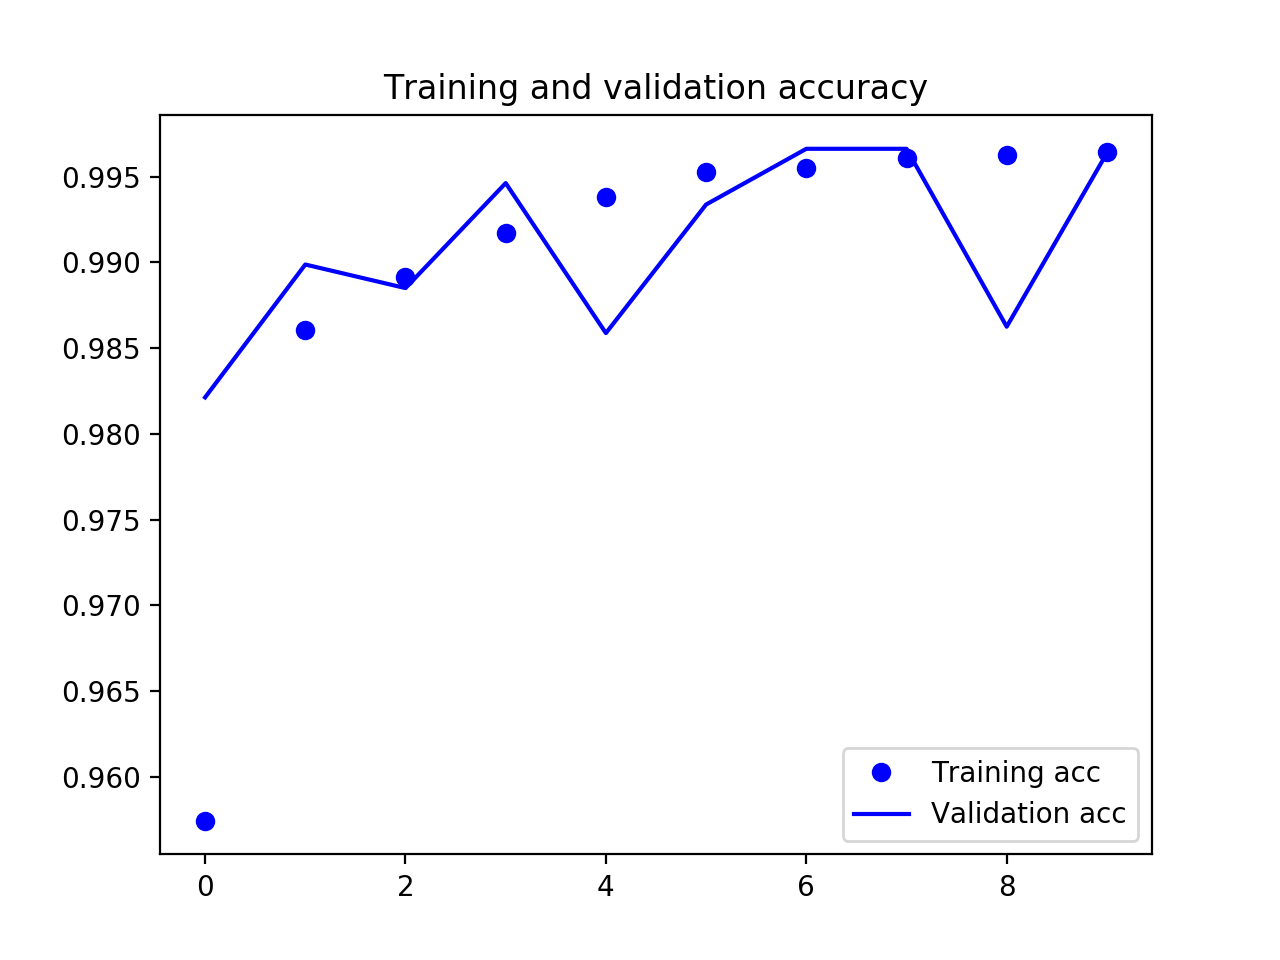

<IPython.core.display.Javascript object>


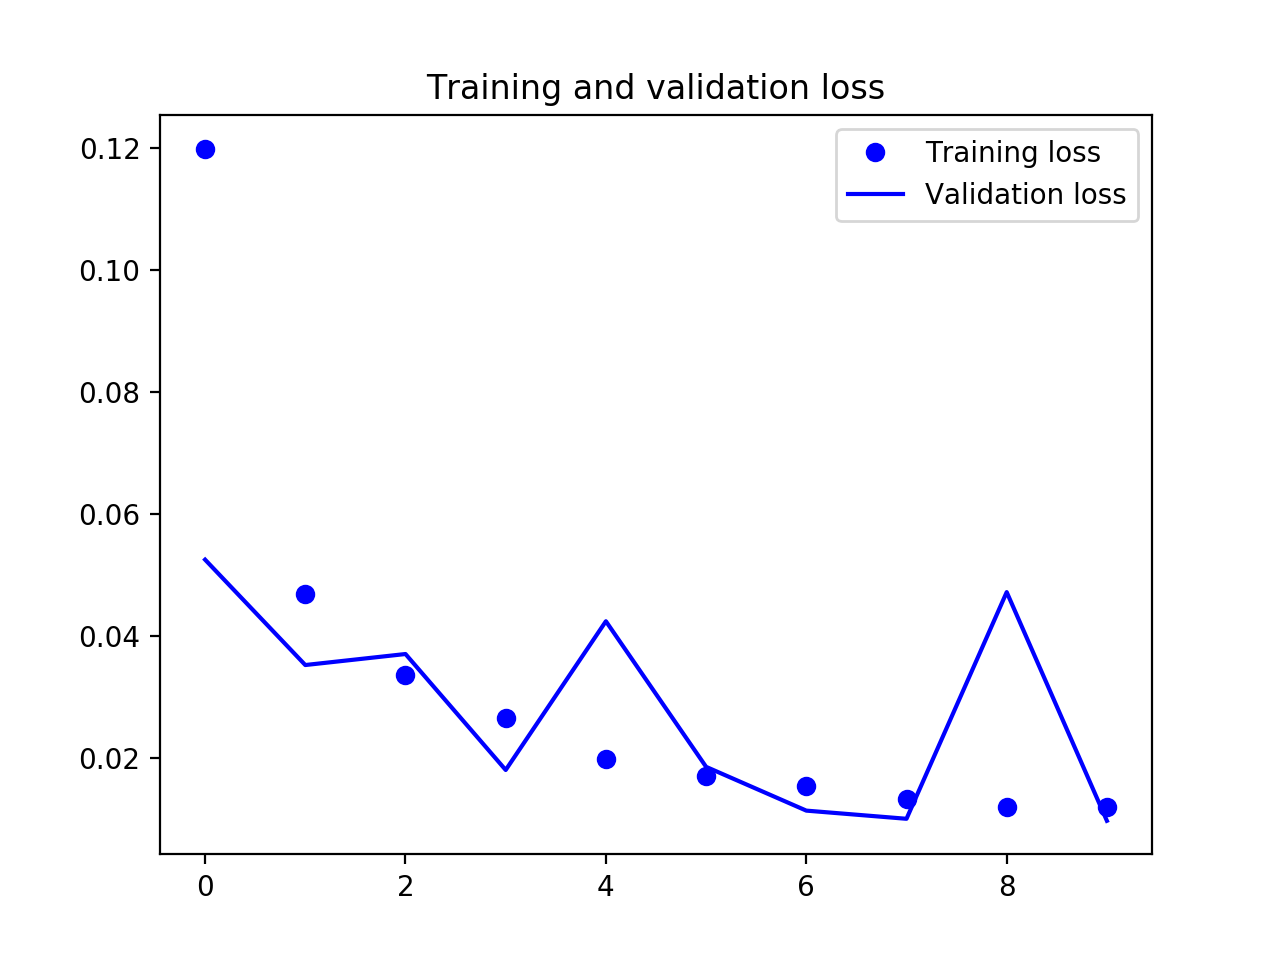

In [17]:
%matplotlib notebook

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [24]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(227, 227),
        batch_size=56,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=40,
        class_mode='binary')





Found 28000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [26]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=800,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=200)

Epoch 1/10
800/800 [==============================] - 510s 638ms/step - loss: 0.0769 - acc: 0.9765 - val_loss: 0.0435 - val_acc: 0.9864
Epoch 2/10
800/800 [==============================] - 487s 608ms/step - loss: 0.0557 - acc: 0.9842 - val_loss: 0.0252 - val_acc: 0.9923
Epoch 3/10
800/800 [==============================] - 487s 609ms/step - loss: 0.0386 - acc: 0.9877 - val_loss: 0.0218 - val_acc: 0.9929
Epoch 4/10
445/800 [===============>..............] - ETA: 3:24 - loss: 0.0333 - acc: 0.9907

KeyboardInterrupt: 